## Machine Learning Problem

It is a binary classification problem,for a given text we need to predict whether the news is fake or not.

#### Data Overview

Source: https://www.kaggle.com/akshayaki/fakenews

- Data is in file News.csv
- Size of News.csv is 116.86 MB 
- News.csv contains 6 columns: Unnamed index column, title, text, subject, date, labels
- Number of rows: 44898

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Data and Basic Stats

In [2]:
# Libraries

import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt 
% matplotlib inline

In [3]:
# reading csv file
data = pd.read_csv("/content/drive/MyDrive/Fake News/News.csv")
data.head()

,Unnamed: 0,title,text,subject,date,Labels
0,0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,politics,"Sep 22, 2016",Fake
1,1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Government News,"Jun 26, 2015",Fake
2,2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,politics,"Dec 23, 2015",Fake
3,3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,left-news,"Nov 25, 2015",Fake
4,4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,politics,"Dec 21, 2016",Fake


In [ ]:
# Checking data
print('Total number of rows : ',data.shape[0])
print('Total number of features : ',data.shape[1])


Total number of rows :  44898
Total number of features :  6


In [ ]:
#Overall feature info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   title       44898 non-null  object
 2   text        44898 non-null  object
 3   subject     44898 non-null  object
 4   date        44898 non-null  object
 5   Labels      44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
# checking  all the columns name
data.columns

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'Labels'], dtype='object')

In [ ]:
print(sum(data.duplicated('Unnamed: 0')))

0


In [ ]:
# Renaming Unnamed column to Id
data.rename(columns={"Unnamed: 0": "id"}, inplace=True)

In [ ]:
# Shuffling data as seen most of the labels are fake at starting so it may cause some problem when we split our data

data = shuffle(data)
data = data.reset_index(drop = True)

In [ ]:
data.head(10)

,id,title,text,subject,date,Labels
0,23711,OBAMA FEAR MONGERING: Republican Party Becomin...,Leave it to Obama to take to fear mongering to...,Government News,"Jan 25, 2016",Fake
1,26364,WOW! IS MEGHAN MCCAIN FINISHED With The Hatefu...,It s pretty common knowledge for anyone s who ...,politics,"Nov 17, 2017",Fake
2,39097,Ben Carson Mistakenly Makes The Case NOT To V...,After dropping out of the Republican president...,News,"April 20, 2016",Fake
3,25533,NSC WILL NOT Fulfill Subpoena Request For Susa...,Judicial Watch today announced that the Nation...,politics,"Jun 20, 2017",Fake
4,11401,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,left-news,"Jun 2, 2016",Fake
5,1755,YOU’LL NEVER BELIEVE WHICH REPUBLICAN JUST CAL...,What kind of leader speaks like this? It s obv...,politics,"Aug 27, 2015",Fake
6,27521,WATCH DINESH D’SOUZA Totally Embarrass Liberal...,If you want to try to dispute Dinesh D Souza s...,politics,"Aug 18, 2017",Fake
7,35753,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,politicsNews,"August 22, 2017",True
8,15250,McCain Opens Up A Can Of Whoop A** On Trump F...,Sen. John McCain is fed up with Donald Trump a...,News,"August 8, 2017",Fake
9,12411,Report: Facebook’s Zuckerberg Gave FBI’s Muell...,The information below is almost like a satire ...,Government News,"Sep 8, 2017",Fake


## Basic Data Exploration

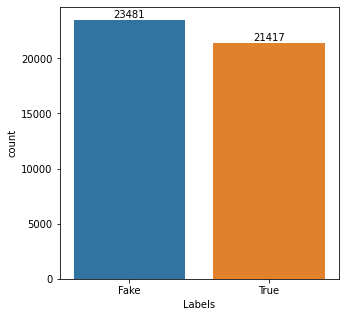

In [ ]:
# No. of fake news and true news

plt.figure(figsize=(5,5))
sub = sns.countplot(x =data["Labels"], data = data)

for p in sub.patches:
        sub.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

### Observations:
- No. of Fake news is more than the True news
- As seen their is small difference between fake and true labels so, the dataset is balanced

In [ ]:
#checking count between fake news and true news

data.groupby("Labels")['text'].count()

Labels
Fake    23481
True    21417
Name: text, dtype: int64

In [ ]:
data['subject'].describe()

count            44898
unique               8
top       politicsNews
freq             11272
Name: subject, dtype: object

In [ ]:
# based on subject counting total number of news for each

print(data['subject'].value_counts())


politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


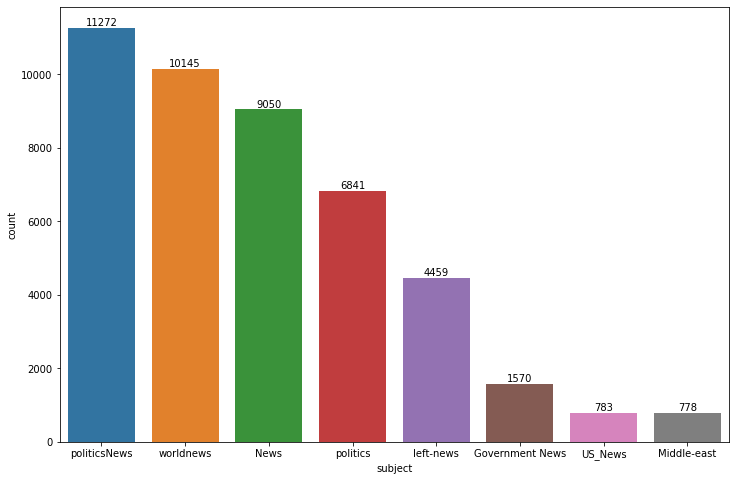

In [ ]:
# visualizing news count based on subject
plt.figure(figsize=(12,8))

sub= sns.countplot(x=data["subject"], data=data, order = data["subject"].value_counts().index)
for p in sub.patches:
        sub.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

## Observation
- most of the news is from politicalNews and worldnews.
- least number of news is from US_News and Middle-east

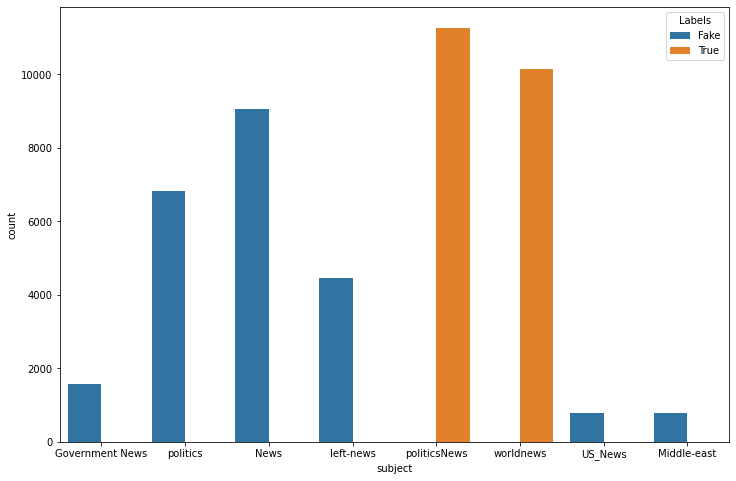

In [ ]:
# Checking True and Fake news based on each subject in a single plot


# sns.catplot(x="subject", hue="Labels", kind="count",
#             palette="tab10",
#             data=data,height=8.27, aspect=11.7/8.27)
plt.figure(figsize=(12,8))
sns.countplot(x=data["subject"], hue =data["Labels"], data = data)


## Observation
- It can be seen that all the news from politicsNews and worldnews are true /real means those are authentic source of news
- All the news from News,politics,left-news, middle-east, Government News, US_News are Fake means not a authentic source of news

In [ ]:
#Fake news count for each subject
print("Fake News Count based on Subject :\n\n",data[data["Labels"] == "Fake"]['subject'].value_counts())

Fake News Count based on Subject :

 News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


In [ ]:
#True news count for each subject
print("True News Count based on Subject :\n\n",data[data["Labels"] == "True"]['subject'].value_counts())

True News Count based on Subject :

 politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


# **Distribution plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'News length distribution')

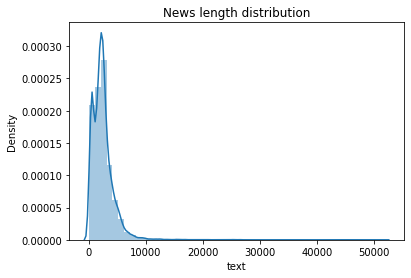

In [ ]:
sns.distplot(data['text'].str.len()).set_title('News length distribution')

## **Observation**
- right skewed
- most of the news text length is betweeen 0 to 10,000
- only few of the news text length is above 10,000 

## Wordcloud Visuals

#### Word Cloud for True words

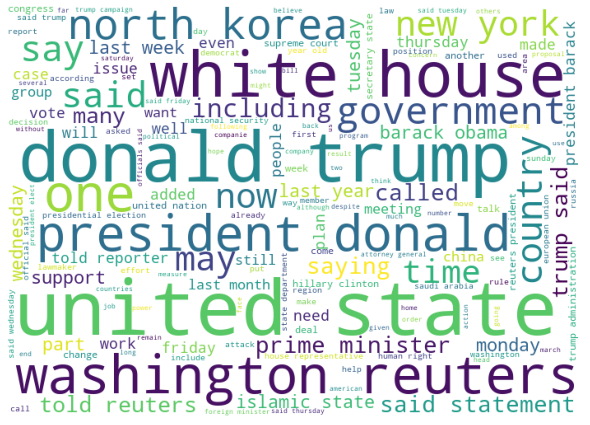

In [ ]:
True_words =''

stopwords = set(STOPWORDS)

for sent in data[data["Labels"]=="True"].text:
    words = sent.split()
    for w in range(len(words)):
        words[w] = words[w].lower()
    
    True_words+=" ".join(words)+" "



wordcloud = WordCloud(width = 700, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(True_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Word Cloud for Fake words

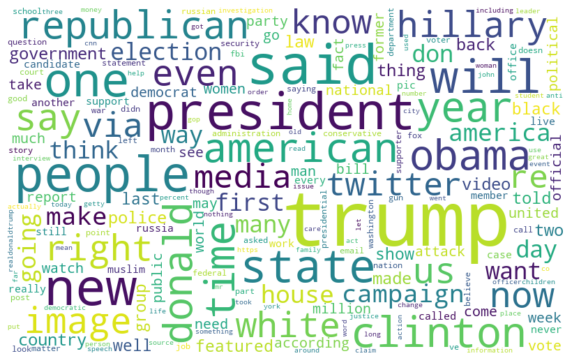

In [ ]:
Fake_words =''

stopwords = set(STOPWORDS)

for sent in data[data["Labels"]=="Fake"].text:
    words = sent.split()
    for w in range(len(words)):
        words[w] = words[w].lower()
    
    Fake_words+=" ".join(words)+" "


wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          stopwords = stopwords, 
                          background_color ='white', 
                          collocations = False).generate(Fake_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Cleaning and Text Preprocessing

In [ ]:
data['total'] = data['title'] +' '+ data['text']

In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.drop(["text"],axis=1,inplace=True)
data.drop(["date"],axis=1,inplace=True)
data.head()

,id,subject,Labels,total
0,23711,Government News,Fake,OBAMA FEAR MONGERING: Republican Party Becomin...
1,26364,politics,Fake,WOW! IS MEGHAN MCCAIN FINISHED With The Hatefu...
2,39097,News,Fake,Ben Carson Mistakenly Makes The Case NOT To V...
3,25533,politics,Fake,NSC WILL NOT Fulfill Subpoena Request For Susa...
4,11401,left-news,Fake,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...


In [ ]:
#checking if their is any missing value or null values

print('missing or null values in any features:\n',data.isnull().sum())

missing or null values in any features:
 id         0
subject    0
Labels     0
total      0
dtype: int64


In [ ]:
# checking imputed value
total_missing_values = len(data[data['total'] == ' '].index)
total_missing_values

0

In [ ]:
# Checking for duplicates
print(sum(data.duplicated(subset={'id','total','subject'}, keep='first' )))

0


In [ ]:
data['total'].values[11]

'WHAT IS GOING ON WITH HILLARY’S EYES…Could It Be Related To Parkinson’s Disease? [VIDEO] Hillary spoke to a very small group of students at Temple University. With a total student population of just under 38,000, her estimated crowd of 300 would be considered by most, to be a total bust. Unfit Hillary wasn t about to let 37,700 disinterested students stand in the way of addressing 300 paid plants  students about the benefits of a taxpayer funded education or a President who is willing, on behalf of the American taxpayer, to forgive their debts What the heck is Hillary hiding now? What is going on with her eyes in this video?  We looked into symptoms of patients with Parkinson s Disease and here s what we found:Visual motor symptoms of patients with Parkinson s Disease:  Some vision difficulties are related to changes in the movement of the eyeball. These are motor symptoms, similar to other motor symptoms caused by loss of dopamine neurons.  Blurred or double vision, and eye strain, b

In [ ]:
sentence = data['total'].values[11]


In [ ]:
#remove urls from text

sentence = re.sub(r"http\S+", "", sentence)
sentence = re.sub(r"\S+(.com)\S+", "", sentence)
print(sentence)

WHAT IS GOING ON WITH HILLARY’S EYES…Could It Be Related To Parkinson’s Disease? [VIDEO] Hillary spoke to a very small group of students at Temple University. With a total student population of just under 38,000, her estimated crowd of 300 would be considered by most, to be a total bust. Unfit Hillary wasn t about to let 37,700 disinterested students stand in the way of addressing 300 paid plants  students about the benefits of a taxpayer funded education or a President who is willing, on behalf of the American taxpayer, to forgive their debts What the heck is Hillary hiding now? What is going on with her eyes in this video?  We looked into symptoms of patients with Parkinson s Disease and here s what we found:Visual motor symptoms of patients with Parkinson s Disease:  Some vision difficulties are related to changes in the movement of the eyeball. These are motor symptoms, similar to other motor symptoms caused by loss of dopamine neurons.  Blurred or double vision, and eye strain, be

In [ ]:
import re

def decontracted(sentence):
    # specific
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)
    

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence


In [ ]:
sentence = decontracted(sentence)
print(sentence)

WHAT IS GOING ON WITH HILLARY’S EYES…Could It Be Related To Parkinson’s Disease? [VIDEO] Hillary spoke to a very small group of students at Temple University. With a total student population of just under 38,000, her estimated crowd of 300 would be considered by most, to be a total bust. Unfit Hillary wasn t about to let 37,700 disinterested students stand in the way of addressing 300 paid plants  students about the benefits of a taxpayer funded education or a President who is willing, on behalf of the American taxpayer, to forgive their debts What the heck is Hillary hiding now? What is going on with her eyes in this video?  We looked into symptoms of patients with Parkinson s Disease and here s what we found:Visual motor symptoms of patients with Parkinson s Disease:  Some vision difficulties are related to changes in the movement of the eyeball. These are motor symptoms, similar to other motor symptoms caused by loss of dopamine neurons.  Blurred or double vision, and eye strain, be

In [ ]:
#remove special character and other puntuations

sentence = re.sub(r"[^\w\s]", "", sentence)
print(sentence)

WHAT IS GOING ON WITH HILLARYS EYESCould It Be Related To Parkinsons Disease VIDEO Hillary spoke to a very small group of students at Temple University With a total student population of just under 38000 her estimated crowd of 300 would be considered by most to be a total bust Unfit Hillary wasn t about to let 37700 disinterested students stand in the way of addressing 300 paid plants  students about the benefits of a taxpayer funded education or a President who is willing on behalf of the American taxpayer to forgive their debts What the heck is Hillary hiding now What is going on with her eyes in this video  We looked into symptoms of patients with Parkinson s Disease and here s what we foundVisual motor symptoms of patients with Parkinson s Disease  Some vision difficulties are related to changes in the movement of the eyeball These are motor symptoms similar to other motor symptoms caused by loss of dopamine neurons  Blurred or double vision and eye strain because the eyes may have

In [ ]:
# remove numbers in text

sentence = re.sub("\S*\d\S*", "", sentence).strip()
print(sentence)

WHAT IS GOING ON WITH HILLARYS EYESCould It Be Related To Parkinsons Disease VIDEO Hillary spoke to a very small group of students at Temple University With a total student population of just under  her estimated crowd of  would be considered by most to be a total bust Unfit Hillary wasn t about to let  disinterested students stand in the way of addressing  paid plants  students about the benefits of a taxpayer funded education or a President who is willing on behalf of the American taxpayer to forgive their debts What the heck is Hillary hiding now What is going on with her eyes in this video  We looked into symptoms of patients with Parkinson s Disease and here s what we foundVisual motor symptoms of patients with Parkinson s Disease  Some vision difficulties are related to changes in the movement of the eyeball These are motor symptoms similar to other motor symptoms caused by loss of dopamine neurons  Blurred or double vision and eye strain because the eyes may have trouble moving 

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')


words = nltk.word_tokenize(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Stemming

# from nltk.stem.snowball import SnowballStemmer

# snow_stemmer = SnowballStemmer('english')


# stem_result = [snow_stemmer.stem(w) for w in words if len(w)>2]
# # stem_words = ' '.join(stem_result)

    
# stem_result

In [ ]:
# Lemmatization
nltk.download('wordnet')
lemmatize_word = [WordNetLemmatizer().lemmatize(w) for w in words if len(w)>2]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Combining all above preprocessing technique**

In [ ]:

# combining all the above text preprocessing

from tqdm import tqdm



for index, row in tqdm(data.iterrows(),total=data.shape[0]):
        sent = row['total']
        sent = re.sub(r"http\S+", "", sent)            # removing urls
        sent = re.sub(r"\S+(.com)\S*", "", sent)       # removing url without http
        sent = decontracted(sent)                      # decontracting words
        sent = re.sub(r"[^\w\s]", "", sent)           # special characters or puntuations
        sent = re.sub("\S*\d\S*", "", sent).strip()   # removing numbers 
        sent = nltk.word_tokenize(sent)               # tokenizing
        words = [word.lower() for word in sent if word.lower() not in stopwords.words('english')]   # removing stopwords
        lemmatize_word = [WordNetLemmatizer().lemmatize(w) for w in words if len(w)>2]     # lemmatization
        filtered_data = ' '.join(lemmatize_word)
        data.loc[index,'total'] = filtered_data
        

100%|██████████| 44898/44898 [49:02<00:00, 15.26it/s]


In [ ]:
data.head()

,id,subject,Labels,total
0,23711,Government News,Fake,obama fear mongering republican party unrecogn...
1,26364,politics,Fake,wow meghan mccain finished hateful hag view to...
2,39097,News,Fake,ben carson mistakenly make case vote trump dai...
3,25533,politics,Fake,nsc fulfill subpoena request susan rice unmask...
4,11401,left-news,Fake,busted hillary bill clinton massive money laun...


### **Storing to pickel file**

In [ ]:
data.to_pickle('/content/drive/MyDrive/Fake News/pickels/44k_news')

### **Reading data from pickel file**

In [ ]:
data = pd.read_pickle("/content/drive/MyDrive/Fake News/pickels/44k_news")

In [ ]:
#checking data
data.head()

,id,subject,Labels,total
0,23711,Government News,Fake,obama fear mongering republican party unrecogn...
1,26364,politics,Fake,wow meghan mccain finished hateful hag view to...
2,39097,News,Fake,ben carson mistakenly make case vote trump dai...
3,25533,politics,Fake,nsc fulfill subpoena request susan rice unmask...
4,11401,left-news,Fake,busted hillary bill clinton massive money laun...


### **Word Frequency**

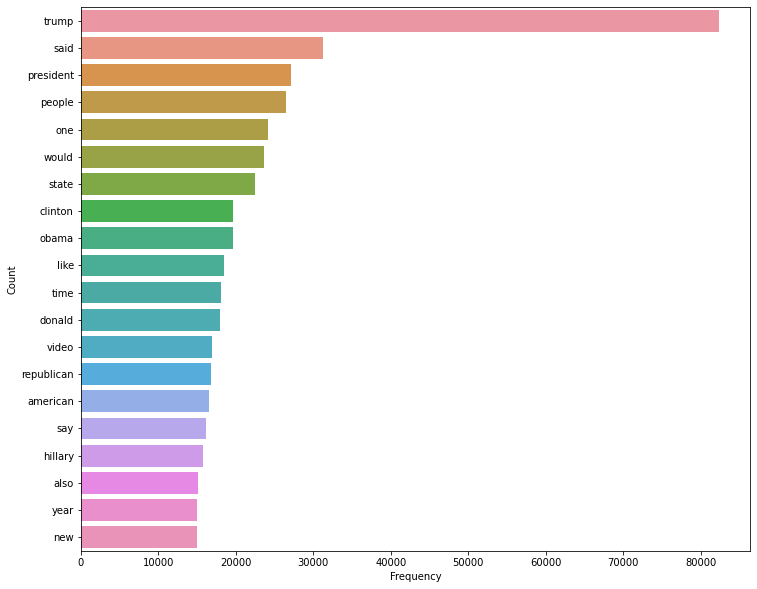

In [ ]:
#Fake news words count
dict = {}
for sent in data[data["Labels"]=="Fake"].total:
    words = sent.split()
    for w in words:
      dict[w] = dict.get(w, 0) + 1

word_frequency = pd.DataFrame({"Word": list(dict.keys()),
                                   "Frequency": list(dict.values())})
word_frequency = word_frequency.nlargest(columns = "Frequency", n = 20)
plt.figure(figsize=(12,10))
ax = sns.barplot(data = word_frequency, x = "Frequency", y = "Word")
ax.set(ylabel = "Count")
plt.xticks(rotation='horizontal')
plt.show()

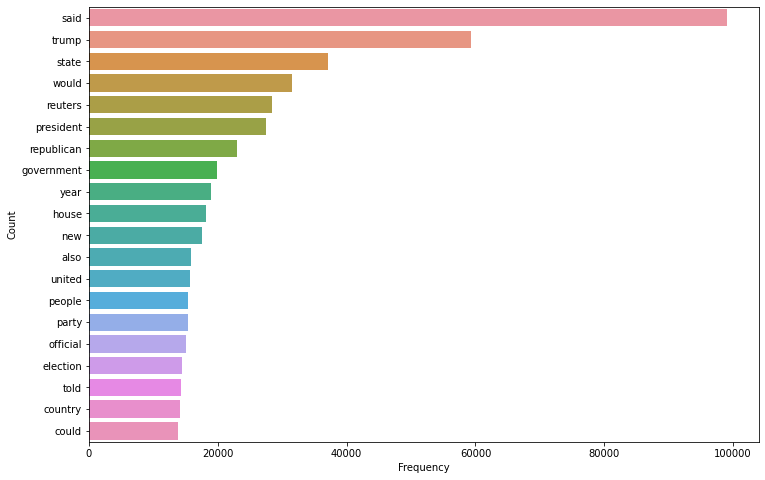

In [ ]:
#True news words count
dict = {}
for sent in data[data["Labels"]=="True"].total:
    words = sent.split()
    for w in words:
      dict[w] = dict.get(w, 0) + 1

word_frequency = pd.DataFrame({"Word": list(dict.keys()),
                                   "Frequency": list(dict.values())})
word_frequency = word_frequency.nlargest(columns = "Frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word_frequency, x = "Frequency", y = "Word")
ax.set(ylabel = "Count")
plt.xticks(rotation='horizontal')
plt.show()



### **Converting labels into binary numerical form**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(data['Labels'])


data['Labels'] = labels
#Fake as 0
#True as 1

In [ ]:
data.head()

,id,subject,Labels,total
0,23711,Government News,0,obama fear mongering republican party unrecogn...
1,26364,politics,0,wow meghan mccain finished hateful hag view to...
2,39097,News,0,ben carson mistakenly make case vote trump dai...
3,25533,politics,0,nsc fulfill subpoena request susan rice unmask...
4,11401,left-news,0,busted hillary bill clinton massive money laun...


## Split the data in train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.total, data.Labels, test_size=0.2, random_state=0)

## **Feature Extraction**

**Countvectorizer**

In [ ]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=10, max_features=5000)

#Train
X_train_count_vec = text_vectorizer.fit_transform(X_train).toarray()
print("Train count vectorizer: ",X_train_count_vec.shape) 


#Test
X_test_count_vec=text_vectorizer.transform(X_test).toarray()
print("Test count vectorizer: ",X_test_count_vec.shape) 



Train count vectorizer:  (35918, 5000)
Test count vectorizer:  (8980, 5000)


**TfidfVectorizer**

In [ ]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range = (1,3), min_df=10, norm ='l2', max_features=5000)

#train
X_train_tfidf_vec = tfidf_vec.fit_transform(X_train).toarray()
print("Train Tfidf vectorizer: ",X_train_tfidf_vec.shape) 


#test
X_test_tfidf_vec = tfidf_vec.transform(X_test).toarray()
print("Test Tfidf vectorizer: ",X_test_tfidf_vec.shape) 


Train Tfidf vectorizer:  (35918, 5000)
Test Tfidf vectorizer:  (8980, 5000)


### **Doc2Vec**

In [ ]:
# Doc2Vec
from tqdm import tqdm
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
import numpy as np

In [ ]:
def sentences_with_tags(document, tag_type):
  tagging_each= []

  for index, list_of_sentence in enumerate(document):
    tagging_each.append(TaggedDocument(list_of_sentence.split(),[tag_type + '_' + str(index)]))
  
  return tagging_each

In [ ]:
#Train
X_train = sentences_with_tags(X_train, 'Train')

#Test
X_test = sentences_with_tags(X_test, 'Test')

#Combining both train and test to find vectors and then splitting them using their tags
combined_text_data = X_train + X_test

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, min_count=2)
model_dbow.build_vocab([words for words in tqdm(combined_text_data)])

100%|██████████| 44898/44898 [00:00<00:00, 2766503.03it/s]


In [ ]:
#train model
model_dbow.train(utils.shuffle([w for w in tqdm(combined_text_data)]), total_examples = len(combined_text_data), epochs = 30)

100%|██████████| 44898/44898 [00:00<00:00, 1412732.74it/s]


In [ ]:
# converting to vector form
def dbow_vectors(model, doc_size, vec_size , vec_type):
  vec = np.zeros((doc_size, vec_size))
  for i in range(0, doc_size):
    vec[i] = model.docvecs[vec_type + '_' + str(i)]
  return vec


In [ ]:
#Train
X_train_dbow_vec = dbow_vectors(model_dbow, len(X_train), 300, 'Train')
print(X_train_dbow_vec.shape)

#Test
X_test_dbow_vec = dbow_vectors(model_dbow, len(X_test), 300, 'Test')
print(X_test_dbow_vec.shape)

(35918, 300)
(8980, 300)
